In [3]:
import os
import sys
sys.path.append("./..")
from utils import PROJECT_ROOT, process_Danenberg_clinical_data, process_Jackson_clinical_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import networkx as nx
from matplotlib.lines import Line2D
import pandas as pd
from c_Population_graph.population_graph import construct_PopulationGraph

# Parameters

In [20]:
iteration = 2
PhenoGraph_k =  100
node_label = 'CellType'
Pattern_ids = [[34, 12, 21, 24, 25, 26]]

# Subset 1

### Clinical

In [21]:
clinical = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Input",
        "Clinical",
        "Danenberg",
        "clinical.csv",
    )
)
clinical.head()


,Unnamed: 0,metabric_id,patient_id,Cohort,Overall Survival (Months),Overall Survival Status,Relapse Free Status (Months),Relapse Free Status,Chemotherapy,Radio Therapy,...,ERStatus,ERBB2_pos,Grade,sizeOrdinal,LymphNodesOrdinal,PAM50,isDiscovery,IntClust,Clinical Subtype,Subset_id
0,1,MB-0002,2,1.0,84.633333,0.0,83.52,0.0,NO,YES,...,pos,False,3.0,5-10mm,0,Luminal A,True,IntClust 4+,HR+/HER2-,2
1,2,MB-0005,5,1.0,163.700000,1.0,151.28,1.0,YES,NO,...,pos,False,2.0,10-20mm,1,Luminal B,True,IntClust 3,HR+/HER2-,2
2,3,MB-0006,6,1.0,164.933333,0.0,162.76,0.0,YES,YES,...,pos,False,2.0,20-50mm,2-3,Luminal B,True,IntClust 9,HR+/HER2-,1
3,5,MB-0010,10,1.0,7.800000,1.0,2.89,1.0,NO,YES,...,pos,False,3.0,20-50mm,0,Luminal B,True,IntClust 7,HR+/HER2-,1
4,6,MB-0014,14,1.0,164.333333,0.0,162.17,0.0,YES,YES,...,pos,False,2.0,5-10mm,1,Luminal B,True,IntClust 3,HR+/HER2-,1


### Histogram

In [22]:
SoftWL_dict = pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel_random_split",
            "Danenberg",
            "Subset_1",
            "SoftWL_dict_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            +'_'
            +str(node_label)
            + ".pkl",
        ),
        "rb",
    ),
)

Histograms = SoftWL_dict["Histogram"]
Patient_IDs = SoftWL_dict["Patient_id"]
Histograms = Histograms/np.sum(Histograms,axis=1, keepdims=True)

### Presentation in 3 grade

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.536e-03 U_stat=9.542e+03
Pattern [34, 12, 21, 24, 25, 26] in 0 has 66% of patients
Pattern [34, 12, 21, 24, 25, 26] in 1 has 83% of patients


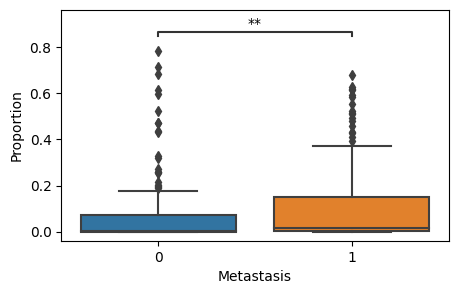

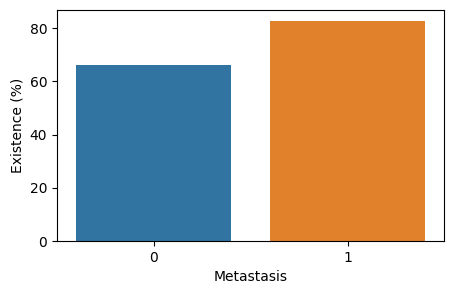

In [23]:

Metastasis = np.array([clinical.loc[clinical["patient_id"] == patient_id, "Lymph nodes examined positive"].values[0]
        for patient_id in Patient_IDs])
Metastasis[Metastasis>0] = 1

for pattern_id in Pattern_ids:
    histogram = np.sum(Histograms[:, np.array(pattern_id)], axis = 1)
    DF_presentation = pd.DataFrame(
        {
            "Proportion": histogram,
            "Metastasis": Metastasis,
        }
    )
    DF_presentation = DF_presentation.dropna()
    f, ax = plt.subplots(figsize=(5, 3))
    sns.boxplot(
        x="Metastasis",
        y="Proportion",
        data=DF_presentation,
        showfliers=True,
        order = [0,1]
        # order=["HR+/HER2-", "HR+/HER2+", "HR-/HER2+", "TNBC"],
    )
    from statannotations.Annotator import Annotator
    annot = Annotator(
        ax,
        [(0,1)],
        data=DF_presentation,
        x="Metastasis",
        y="Proportion",
        order = [0,1]
    )
    annot.configure(test="Mann-Whitney", text_format="star", loc="inside", verbose=2, )
    annot.apply_test()
    ax, test_results = annot.annotate()

    DF_existence = pd.DataFrame(
        {
            "Metastasis": [0,1],
        }
    )
    for metastasis in [0,1]:
        data = DF_presentation.loc[
            DF_presentation["Metastasis"] == metastasis, "Proportion"
        ].values

        exisitence_ratio = np.sum(data > 0) / len(data)
        DF_existence.loc[
            DF_existence["Metastasis"] == metastasis, "Existence (%)"
        ] = (exisitence_ratio * 100)
        print(
            "Pattern {} in {} has {:.0f}% of patients".format(
                pattern_id, metastasis, exisitence_ratio * 100
            )
        )
    f, ax = plt.subplots(figsize=(5, 3))
    sns.barplot(
        x="Metastasis",
        y="Existence (%)",
        data=DF_existence,
        order=[0,1],
    )

# Subset 2

### Clinical

In [24]:
clinical = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Input",
        "Clinical",
        "Danenberg",
        "clinical.csv",
    )
)
clinical.head()


,Unnamed: 0,metabric_id,patient_id,Cohort,Overall Survival (Months),Overall Survival Status,Relapse Free Status (Months),Relapse Free Status,Chemotherapy,Radio Therapy,...,ERStatus,ERBB2_pos,Grade,sizeOrdinal,LymphNodesOrdinal,PAM50,isDiscovery,IntClust,Clinical Subtype,Subset_id
0,1,MB-0002,2,1.0,84.633333,0.0,83.52,0.0,NO,YES,...,pos,False,3.0,5-10mm,0,Luminal A,True,IntClust 4+,HR+/HER2-,2
1,2,MB-0005,5,1.0,163.700000,1.0,151.28,1.0,YES,NO,...,pos,False,2.0,10-20mm,1,Luminal B,True,IntClust 3,HR+/HER2-,2
2,3,MB-0006,6,1.0,164.933333,0.0,162.76,0.0,YES,YES,...,pos,False,2.0,20-50mm,2-3,Luminal B,True,IntClust 9,HR+/HER2-,1
3,5,MB-0010,10,1.0,7.800000,1.0,2.89,1.0,NO,YES,...,pos,False,3.0,20-50mm,0,Luminal B,True,IntClust 7,HR+/HER2-,1
4,6,MB-0014,14,1.0,164.333333,0.0,162.17,0.0,YES,YES,...,pos,False,2.0,5-10mm,1,Luminal B,True,IntClust 3,HR+/HER2-,1


### Histograms

In [25]:
SoftWL_dict = pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel_random_split",
            "Danenberg",
            "Subset_2",
            "Matched_SoftWL_dict_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            +'_'
            +str(node_label)
            + "_centroid_alignment.pkl",
        ),
        "rb",
    ),
)

Histograms = SoftWL_dict["Histogram"]
Patient_IDs = SoftWL_dict["Patient_id"]
Histograms = Histograms/np.sum(Histograms,axis=1, keepdims=True)

### Presentation in 4 clinical subtypes

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:4.157e-01 U_stat=3.950e+03
Pattern [34, 12, 21, 24, 25, 26] in 0 has 73% of patients
Pattern [34, 12, 21, 24, 25, 26] in 1 has 69% of patients


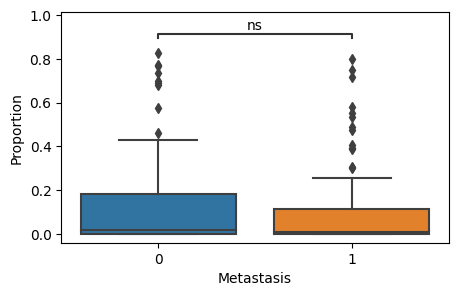

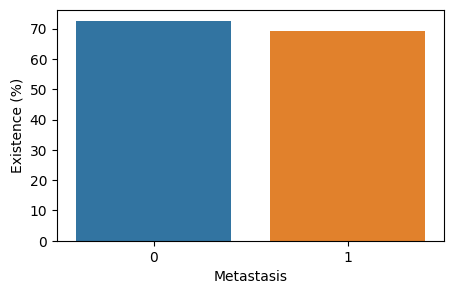

In [26]:

Metastasis = np.array([clinical.loc[clinical["patient_id"] == patient_id, "Lymph nodes examined positive"].values[0]
        for patient_id in Patient_IDs])
Metastasis[Metastasis>0] = 1

for pattern_id in Pattern_ids:
    histogram = np.sum(Histograms[:, np.array(pattern_id)], axis = 1)
    DF_presentation = pd.DataFrame(
        {
            "Proportion": histogram,
            "Metastasis": Metastasis,
        }
    )
    DF_presentation = DF_presentation.dropna()
    f, ax = plt.subplots(figsize=(5, 3))
    sns.boxplot(
        x="Metastasis",
        y="Proportion",
        data=DF_presentation,
        showfliers=True,
        order = [0,1]
        # order=["HR+/HER2-", "HR+/HER2+", "HR-/HER2+", "TNBC"],
    )
    from statannotations.Annotator import Annotator
    annot = Annotator(
        ax,
        [(0,1)],
        data=DF_presentation,
        x="Metastasis",
        y="Proportion",
        order = [0,1]
    )
    annot.configure(test="Mann-Whitney", text_format="star", loc="inside", verbose=2, )
    annot.apply_test()
    ax, test_results = annot.annotate()

    DF_existence = pd.DataFrame(
        {
            "Metastasis": [0,1],
        }
    )
    for metastasis in [0,1]:
        data = DF_presentation.loc[
            DF_presentation["Metastasis"] == metastasis, "Proportion"
        ].values

        exisitence_ratio = np.sum(data > 0) / len(data)
        DF_existence.loc[
            DF_existence["Metastasis"] == metastasis, "Existence (%)"
        ] = (exisitence_ratio * 100)
        print(
            "Pattern {} in {} has {:.0f}% of patients".format(
                pattern_id, metastasis, exisitence_ratio * 100
            )
        )
    f, ax = plt.subplots(figsize=(5, 3))
    sns.barplot(
        x="Metastasis",
        y="Existence (%)",
        data=DF_existence,
        order=[0,1],
    )

# Jackson

### Clinical

In [27]:
clinical = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Input",
        "Clinical",
        "Jackson",
        "clinical.csv",
    )
)
clinical = process_Jackson_clinical_data(clinical)
clinical.head()


,Unnamed: 0,patient_id,Relapse Free Status (Months),Relapse Free Status,Overall Survival (Months),Overall Survival Status,Grade,tumor_size,Age,PTNM_T,...,Post-surgeryTx,response,Subtype,clinical_type,Relapse-free Status (Months),Clinical Subtype,HR+/HER2-,HR+/HER2+,HR-/HER2+,TNBC
0,0,1,0.0,1:Recurred,33.0,1,2,35,83,2,...,Hormone therapy,Refractory,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0
1,1,2,101.0,1:Recurred,101.0,0,2,15,40,1c,...,Chemotherapy - Tamoxifen,NaN,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0
2,2,3,23.0,1:Recurred,23.0,1,3,75,63,3,...,Chemotherapy - Hormone therapy,Refractory,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0
3,3,4,63.0,1:Recurred,63.0,0,1,11,49,1c,...,Tamoxifen,Sensitive,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0
4,5,5,79.0,1:Recurred,79.0,0,2,19,49,1c,...,Tamoxifen,Sensitive,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0


In [28]:
clinical['Post-surgeryTx'].value_counts()

Tamoxifen                                     94
Chemotherapy                                  34
Chemotherapy - Tamoxifen                      25
Hormone therapy                               20
Anastrazol                                    19
none                                          17
Chemotherapy - Hormone therapy                 7
Letrozol                                       7
Chemotherapy - Letrozol                        7
Chemotherapy - Anastrazol                      6
Chemotherapy - Immune therapy                  6
Immune therapy                                 6
Immune therapy - Anastrozol                    1
Chemotherapy - Immune therapy - Tamoxifen      1
Tamoxifen - Femara                             1
Exemestan                                      1
Chemotherapy - Immune therapy - Anastrozol     1
Name: Post-surgeryTx, dtype: int64

### Histogram

In [29]:
SoftWL_dict = pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel_random_split",
            "Jackson",
            "Matched_SoftWL_dict_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            +'_'
            +str(node_label)
            + "_centroid_alignment.pkl",
        ),
        "rb",
    ),
)

Histograms = SoftWL_dict["Histogram"]
Patient_IDs = SoftWL_dict["Patient_id"]
Histograms = Histograms/np.sum(Histograms,axis=1, keepdims=True)

In [30]:
# Indices = (clinical['Post-surgeryTx']=='Chemotherapy').values
# Histograms = Histograms[Indices,:]
# Patient_IDs = np.array(Patient_IDs)[Indices]
Response = np.array([clinical.loc[clinical["patient_id"] == patient_id, "response"].values[0]
        for patient_id in Patient_IDs])
print(Response)
Response[Response == 'Sensitive'] = '1'
Response[Response == 'Resistant'] = '0'
Response[Response == 'Refractory'] = '0'
# Response = Response.astype(int)

# Metastasis[Metastasis>0] = 1

for pattern_id in Pattern_ids:
    histogram = Histograms[:, pattern_id - 1]
    DF_presentation = pd.DataFrame(
        {
            "Proportion": histogram,
            "Response": Response,
        }
    )
    DF_presentation = DF_presentation.dropna()

    DF_presentation = DF_presentation.dropna()
    f, ax = plt.subplots(figsize=(5, 3))
    sns.boxplot(
        x="Response",
        y="Proportion",
        data=DF_presentation,
        showfliers=True,
        order = ['0','1']
        # order=["HR+/HER2-", "HR+/HER2+", "HR-/HER2+", "TNBC"],
    )
    from statannotations.Annotator import Annotator
    annot = Annotator(
        ax,
        [('0','1')],
        data=DF_presentation,
        x="Response",
        y="Proportion",
        order = ['0','1']
    )
    annot.configure(test="Mann-Whitney", text_format="star", loc="inside", verbose=2, )
    annot.apply_test()
    ax, test_results = annot.annotate()

    DF_existence = pd.DataFrame(
        {
            "Response": ['0','1'],
        }
    )
    for metastasis in ['0','1']:
        data = DF_presentation.loc[
            DF_presentation["Response"] == metastasis, "Proportion"
        ].values

        exisitence_ratio = np.sum(data > 0) / len(data)
        DF_existence.loc[
            DF_existence["Response"] == metastasis, "Existence (%)"
        ] = (exisitence_ratio * 100)
        print(
            "Pattern {} in {} has {:.0f}% of patients".format(
                pattern_id, metastasis, exisitence_ratio * 100
            )
        )
    f, ax = plt.subplots(figsize=(5, 3))
    sns.barplot(
        x="Response",
        y="Existence (%)",
        data=DF_existence,
        order=['0','1'],
    )

['nan' 'Refractory' 'nan' 'Sensitive' 'nan' 'nan' 'nan' 'Sensitive'
 'Refractory' 'nan' 'Refractory' 'nan' 'nan' 'nan' 'Sensitive' 'nan' 'nan'
 'nan' 'Sensitive' 'Sensitive' 'Refractory' 'nan' 'Sensitive' 'nan'
 'Sensitive' 'Sensitive' 'Sensitive' 'Sensitive' 'nan' 'Resistant'
 'Resistant' 'nan' 'nan' 'Resistant' 'nan' 'nan' 'Resistant' 'Refractory'
 'Sensitive' 'nan' 'nan' 'Resistant' 'Resistant' 'nan' 'nan' 'Sensitive'
 'Resistant' 'Refractory' 'Refractory' 'Sensitive' 'Refractory'
 'Resistant' 'Sensitive' 'Sensitive' 'Sensitive' 'Sensitive' 'nan' 'nan'
 'nan' 'Sensitive' 'Sensitive' 'nan' 'Sensitive' 'nan' 'nan' 'Sensitive'
 'nan' 'Refractory' 'nan' 'Sensitive' 'Resistant' 'nan' 'Sensitive'
 'Resistant' 'nan' 'Sensitive' 'Sensitive' 'Sensitive' 'Sensitive'
 'Sensitive' 'Refractory' 'nan' 'Resistant' 'Sensitive' 'nan' 'Refractory'
 'Refractory' 'Sensitive' 'Sensitive' 'Sensitive' 'nan' 'nan' 'nan' 'nan'
 'Sensitive' 'Sensitive' 'Refractory' 'Sensitive' 'nan' 'Refractory' 'nan'
 'nan'

TypeError: unsupported operand type(s) for -: 'list' and 'int'

### Presentation in 3 Grades

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:6.783e-01 U_stat=4.472e+03
Pattern [34, 12, 21, 24, 25, 26] in 0 has 73% of patients
Pattern [34, 12, 21, 24, 25, 26] in 1 has 72% of patients


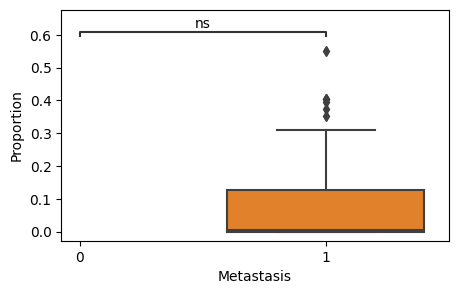

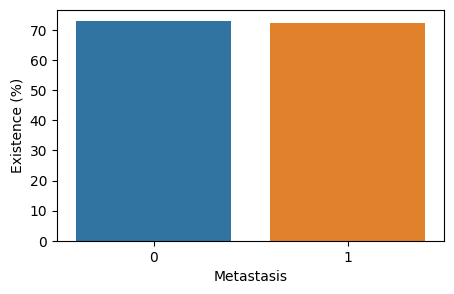

In [31]:

Metastasis = np.array([clinical.loc[clinical["patient_id"] == patient_id, "Lymphaticinvasion"].values[0]
        for patient_id in Patient_IDs])
Metastasis[Metastasis>0] = 1

for pattern_id in Pattern_ids:
    histogram = np.sum(Histograms[:, np.array(pattern_id)], axis = 1)
    DF_presentation = pd.DataFrame(
        {
            "Proportion": histogram,
            "Metastasis": Metastasis,
        }
    )
    DF_presentation = DF_presentation.dropna()
    f, ax = plt.subplots(figsize=(5, 3))
    sns.boxplot(
        x="Metastasis",
        y="Proportion",
        data=DF_presentation,
        showfliers=True,
        order = ['0',1]
        # order=["HR+/'HER2'-", "HR+/HER2+", "HR-/HER2+", "TNBC"],
    )
    from statannotations.Annotator import Annotator
    annot = Annotator(
        ax,
        [(0,1)],
        data=DF_presentation,
        x="Metastasis",
        y="Proportion",
        order = [0,1]
    )
    annot.configure(test="Mann-Whitney", text_format="star", loc="inside", verbose=2, )
    annot.apply_test()
    ax, test_results = annot.annotate()

    DF_existence = pd.DataFrame(
        {
            "Metastasis": [0,1],
        }
    )
    for metastasis in [0,1]:
        data = DF_presentation.loc[
            DF_presentation["Metastasis"] == metastasis, "Proportion"
        ].values

        exisitence_ratio = np.sum(data > 0) / len(data)
        DF_existence.loc[
            DF_existence["Metastasis"] == metastasis, "Existence (%)"
        ] = (exisitence_ratio * 100)
        print(
            "Pattern {} in {} has {:.0f}% of patients".format(
                pattern_id, metastasis, exisitence_ratio * 100
            )
        )
    f, ax = plt.subplots(figsize=(5, 3))
    sns.barplot(
        x="Metastasis",
        y="Existence (%)",
        data=DF_existence,
        order=[0,1],
    )

### K-M Plot

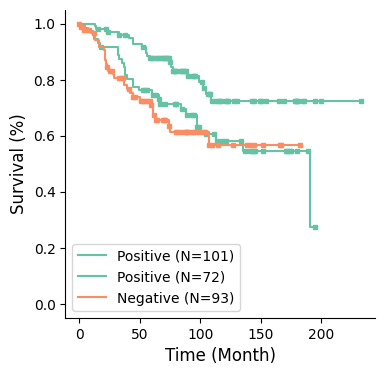

In [23]:
color_palette = sns.color_palette("Set2")
Length = np.array(
    [
        clinical.loc[clinical["patient_id"] == i, "Overall Survival (Months)"].values[0]
        for i in Patient_IDs
    ]
)
Status = np.array(
    [
        clinical.loc[clinical["patient_id"] == i, "Overall Survival Status"].values[0]
        for i in Patient_IDs
    ]
)

from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test, logrank_test

kmf = KaplanMeierFitter()
clinical_subtype="HR+/HER2-"
f, ax = plt.subplots(figsize=(4, 4))
histogram = Histograms[:, Pattern_ids[0] - 1]
length_A, event_observed_A = (
        Length[
            (Clinical_subtype == clinical_subtype)
            & (histogram > 0)
        ],
        Status[
            (Clinical_subtype == clinical_subtype)
            & (histogram > 0)
        ],
    )
label = "Positive (N={})".format(len(length_A))
kmf.fit(length_A, event_observed_A, label=label)
kmf.plot_survival_function(
        ax=ax,
        ci_show=False,
        color=color_palette[0],
        show_censors=True,
        censor_styles={"ms": 3, "marker": "s"},
    )

histogram = Histograms[:, Pattern_ids[0] - 1]
length_A, event_observed_A = (
        Length[
            (Clinical_subtype == clinical_subtype)
            & (histogram == 0)
        ],
        Status[
            (Clinical_subtype == clinical_subtype)
            & (histogram == 0)
        ],
    )
label = "Positive (N={})".format(len(length_A))
kmf.fit(length_A, event_observed_A, label=label)
kmf.plot_survival_function(
        ax=ax,
        ci_show=False,
        color=color_palette[0],
        show_censors=True,
        censor_styles={"ms": 3, "marker": "s"},
    )



length_B, event_observed_B = (
        Length[
            (Clinical_subtype != clinical_subtype)
      
        ],
        Status[
            (Clinical_subtype != clinical_subtype)

        ],
    )
label = "Negative (N={})".format(len(length_B))
kmf.fit(length_B, event_observed_B, label=label)
kmf.plot_survival_function(
        ax=ax,
        ci_show=False,
        color=color_palette[1],
        show_censors=True,
        censor_styles={"ms": 3, "marker": "s"},
    )
    # log_rank_test = multivariate_logrank_test(
    #     np.concatenate([length_A, length_B]),
    #     [0] * len(length_A) + [1] * len(length_B),
    #     np.concatenate([event_observed_A, event_observed_B]),
    # )
    # p_value = log_rank_test.p_value
    # ax.legend(fontsize=10)
    # ax.set_title("{} (p-value = {:.5f})".format(clinical_subtype, p_value), fontsize=12)
ax.set_xlabel("Time (Month)", fontsize=12)
ax.set_ylabel("Survival (%)", fontsize=12)
ax.set(
        ylim=(-0.05, 1.05),
    )
sns.despine()